![image info](https://drive.google.com/uc?id=1AerT9299ijreLjEeIoGLv6SoT-SFC6-m)

# Inhaltsverzeichnis 

- **Naive Bayes Hausaufgabe - Titanic**
    - **1. Aufgabe: Daten laden**
    - **2. Aufgabe: Preprocessing**
    - **3. Aufgabe: Fehlerhafte Daten entfernen**
    - **4. Aufgabe: Daten analysieren**
    - **5. Aufgabe: Dimension reduzieren**
    - **6. Aufgabe: Daten visualisieren**
    - **7. Aufgabe: Machine Learning**
    - **8. Aufgabe: Features nach Klassen getrennt**


# Naive Bayes Hausaufgabe - Titanic

Diese Hausaufgabe analysiert den [Titanic Datensatz](https://www.kaggle.com/competitions/titanic/overview) und ein Naive Bayes Modell wird trainiert. 


## 1. Aufgabe: Daten laden

- Benutze `pandas`, um die Datei `titanic.csv` aus dem Kursbereich zu laden.
- Verschaffe dir ein Gefühl für die Daten. Welche Spalten gibt es? Wie viele Samples gibt es? 


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("titanic.csv")
data.describe() ## 9 columns, 1309 samples
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1308 non-null   float64
 8   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


Hier ein Überblick über die Bedeutung der einzelnen Features:

- `Survival`: Hat der Passagier überlegt?
     - 0 = Nein 
     - 1 = Ja
- `Pclass`: Die Passagierklasse.
     - 1 = erste Klasse
     - 2 = zweite Klasse 
     - 3 = dritte Klasse.
- `Sex`: Das Geschlecht.
- `Age`: Das Alter.
- `Sibsp`: Die Anzahl der Geschwister an Bord.
- `Parch`: Die Anzahl der Eltern/Kinder an Bord.
- `Name`: Der Name.
- `Fare`: Die Kosten des Tickets.
- `Embarked`: An Bord gegangen 
    - C = Cherbourg; 
    - Q = Queenstown; 
    - S = Southampton)

## 2. Aufgabe: Preprocessing 

- Wir wollen, dass `data` nur aus den Spalten der Features `["Age", "Embarked","Fare","Parch", "Pclass","Sex","SibSp"]` und aus der Spalte `Survived` besteht. (`Survived` wollen wir am Ende vorhersagen, wird also unser Target).

**Außerdem:**
- Ersetze die Werte "female" und "male" in der Spalte `Sex` durch 0 und 1.
- Ersetze die Werte "S","C" und "Q" in der Spalte `Embarked` durch 1, 2 und 3.



**Zur Kontrolle: `data` sollte nun 1309 Zeilen und 8 Spalten haben.**


In [2]:
data = data.drop(columns=['Name'],axis=1)

def f(x):
    if x == "female":
        return 0
    elif x == "male":
        return 1

def ff(x):
    if x == "S":
        return 1
    elif x == "C":
        return 2
    elif x == "Q":
        return 3

data["Embarked"] = data["Embarked"].apply(ff)
data["Sex"] = data["Sex"].apply(f) 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


## 3. Aufgabe: Fehlerhafte Daten entfernen

- Entferne alle Samples mit fehlerhaften Werten. Benutze dafür die Funktion [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) des DataFrames.

**Zur Kontrolle: `data` sollte nun 1043 Zeilen und 8 Spalten haben.**

In [3]:
data.dropna(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1043 non-null   int64  
 1   Survived  1043 non-null   int64  
 2   Sex       1043 non-null   int64  
 3   Age       1043 non-null   float64
 4   SibSp     1043 non-null   int64  
 5   Parch     1043 non-null   int64  
 6   Fare      1043 non-null   float64
 7   Embarked  1043 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 73.3 KB


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1301    2.0
1304    2.0
1306    2.0
1307    2.0
1308    1.0
Name: Embarked, Length: 1043, dtype: float64


## 4. Aufgabe: Daten analysieren

Kommen wir nun zum interessanten Teil. Wir wollen für die Daten aus `data` eine Korrelationsmatrix erstellen, um herauszufinden, wie die einzelnen Features korreliert sind.

- Berechne die paarweisen Korrelationen mit der Funktion [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) des DataFrames.
- Lass dir diese Matrix mittels einer [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) schön darstellen. Für die Optik *können* folgende Parameter beim Aufruf von `heatmap` gewählt werden:
    - `annot=True`
    - `fmt=".2f"`
    - `linewidth=0.2`
    
Diese Parameter sind jedoch nur eine Empfehlung. Probiere selbst verschiedene Möglichkeiten die Heatmap zu gestalten.

- Welche Features sind stark korreliert?

> <span style="color:green"> **_ERINNERUNG:_** </span> Ein Feature ist stark **positiv** korreliert, je näher die Zahl an 1 ist und stark **negativ** korreliert, je näher die Zahl an -1 ist.
- Schreibe die Erkenntnisse, die man aus der Korrelationsmatrix gewinnen kann, auf.


,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,-0.317737,0.141032,-0.409082,0.046333,0.016342,-0.564558,-0.113971
Survived,-0.317737,1.000000,-0.536332,-0.057416,-0.011403,0.115436,0.247858,0.108962
Sex,0.141032,-0.536332,1.000000,0.066007,-0.096464,-0.222531,-0.186400,-0.109690
Age,-0.409082,-0.057416,0.066007,1.000000,-0.242345,-0.149311,0.177205,0.050215
SibSp,0.046333,-0.011403,-0.096464,-0.242345,1.000000,0.373960,0.142131,-0.031067
Parch,0.016342,0.115436,-0.222531,-0.149311,0.373960,1.000000,0.217650,-0.036374
Fare,-0.564558,0.247858,-0.186400,0.177205,0.142131,0.217650,1.000000,0.172281
Embarked,-0.113971,0.108962,-0.109690,0.050215,-0.031067,-0.036374,0.172281,1.000000


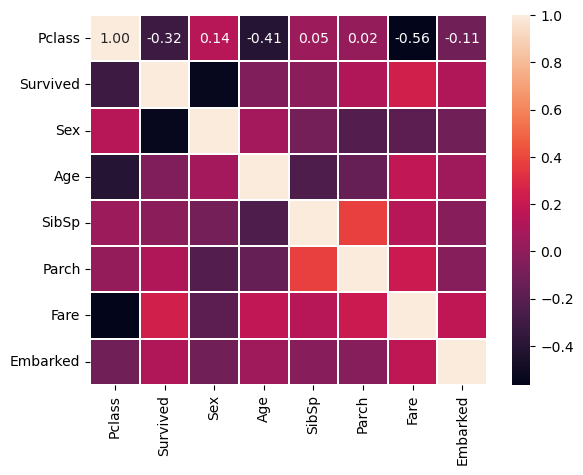

In [19]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=0.2)
corr
## Sex und Survived sind stark negativ korreliert - also überleben Frauen eher als Männer
## Sibsp und Parch sind korreliert also haben Menschen mit Partnern bzw. Kindern, wahrscheinlicher auch weitere Geschwister an Board
## Fare und Pclass sind logischerweise stark negativ korreliert, da deutlich höherklassige Tickets natürlcih mehr kosten
## Survived und Ticketpreis sind schwach positiv korreliert - umsomehr man bezahlte desto wahrscheinlicher war das Überleben
## Survived und Reiseklasse sind negativ korreliert, sodass Menschen die bei einer "niedrigeren" Klasse (Klasse 1) reisten eher überlebten.


## 5. Aufgabe: Dimension reduzieren

Du wirst festgestellt haben, dass die Features `Fare` und `Pclass` stark (negativ) korreliert sind. Dies erscheint logisch, da es 3 Beförderungsklassen auf der Titanic gibt, wobei die erste Klasse die Beste ist.

Eine negative Korrelation zwischen `Fare` und `Pclass` bedeutet nun, dass je **höher** die Klasse, desto **geringer** der Fahrtpreis. Davon war auszugehen!

Da diese Features also etwas redundant sind, wollen wir die Dimension der Daten reduzieren und das Feature `Pclass` komplett entfernen.

- Lösche die Spalte `Pclass` aus `data`.

In [20]:
data = data.drop(columns=['Pclass'],axis=1)

## 6. Aufgabe: Daten visualisieren

Wir haben 4 numerische Features `Age`,`Fare`,`Parch` und `SibSp`. 

- Lass dir für jedes dieser Features die Verteilung anzeigen. Erzeuge hierfür einen [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) für jedes Merkmal. 

D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


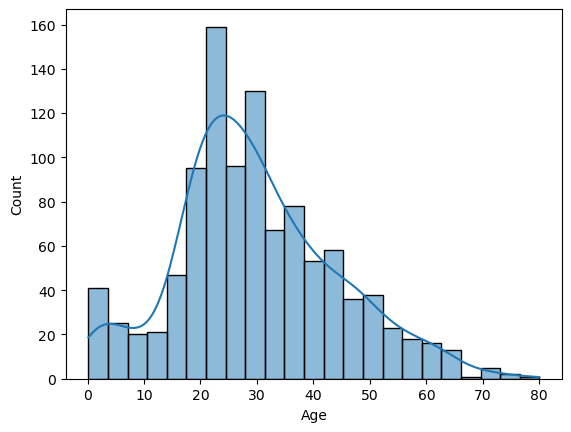

D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


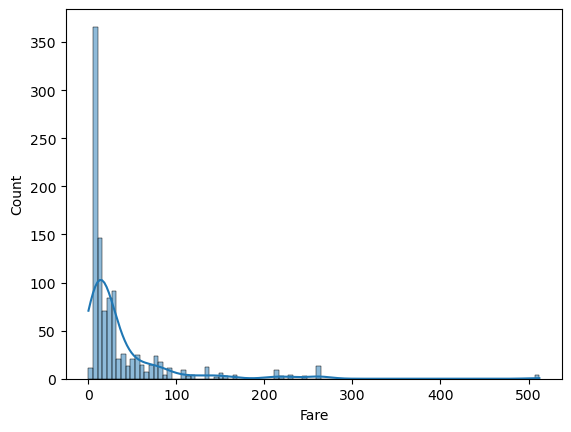

D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


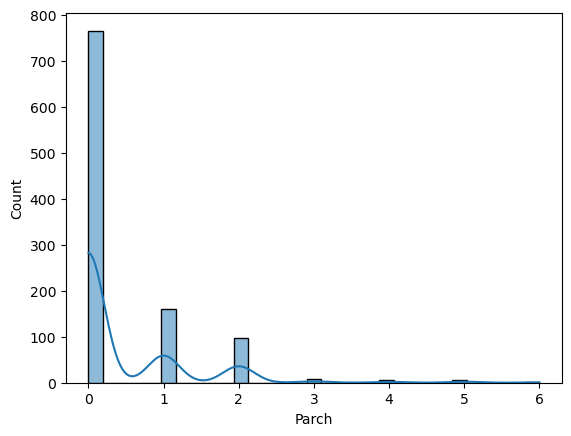

D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


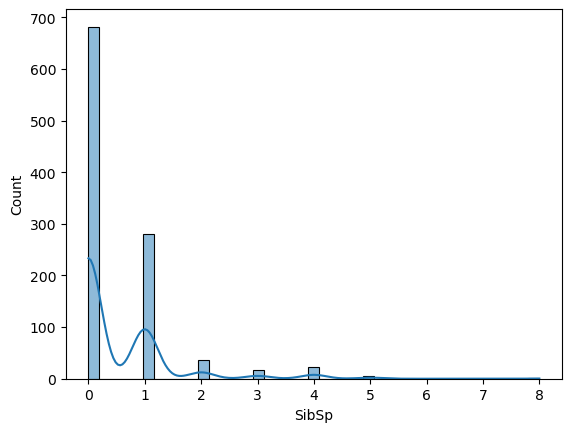

In [56]:
import matplotlib.pyplot as plt

sns.histplot(data=data['Age'], kde=True, label='Age')
plt.show()
sns.histplot(data=data['Fare'], kde=True, label='Fare')
plt.show()
sns.histplot(data=data['Parch'], kde=True, label='Parch')
plt.show()
sns.histplot(data=data['SibSp'], kde=True, label='SibSp')
plt.show()

## 7. Aufgabe: Machine Learning

Wir wollen nun ein Modell trainieren. Dazu müssen wir unser Target `Survived` aus dem `DataFrame` `data` entfernen und in einer separaten Variable speichern. 

- Entferne das Target aus `data` und speichere die Werte in einer neuen Variable.

In [27]:
X = data.drop(columns=['Survived'],axis=1)
y = data['Survived']

print(X.shape)
print(y.shape)


(1043, 6)
(1043,)


Wir wollen nun ein Modell trainieren:

- Splitte die Daten mit der Funktion [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) im Verhältnis 80:20.
- Trainiere eine [Naive Bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) auf den Trainingsdaten.

> <span style="color:red"> **_WICHTIG:_** </span> `sklearn` bietet mehrere möglichen Modelle. Verwende für diese Aufgabe einen [`Gaussian Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB). Wir werden in der nächsten Aufgabe auf ein Attribut zugreifen müssen, welches nur dieses Modell besitzt.


- Berechne für dieses Modell den Score auf den Testdaten.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=110)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"%(X_test.shape[0], (y_test != y_pred).sum()))
print("Genauigkeit: {:.1f}%".format(accuracy_score(y_pred,y_test)*100))


(834, 6)
(834,)
(209, 6)
(209,)
Number of mislabeled points out of a total 209 points : 45
Genauigkeit: 78.5%


## 8. Aufgabe: Features nach Klassen getrennt

Unter dem Attribut `theta_[0]` des Modells befinden sich die Mittelwerte der Features für alle Samples die **nicht** überlebt haben (`Survived=0`). </br>
Unter dem Attribut `theta_[1]` befinden sich die Mittelwerte der Features für alle Samples die überlebt haben (`Survived=1`). 

- Lass dir diese Daten durch eine formatierte `print`-Ausgabe schön darstellen. 

- Was lassen sich die Ergebnisse interpretieren? 

In [53]:
feature_descriptions = [
    "Geschlecht (0=Female, 1=Male)",
    "Alter",
    "Anzahl der Geschwister an Bord",
    "Anzahl der Eltern/Kinder an Bord",
    "Ticketpreis in Dollar",
    "An Bord gegangen (1=C, 2=Q, 3=S)"]

for i in range(2):
    print(f"\nMittelwerte aller Features für {'nicht überlebt' if i == 0 else 'überlebt'}")
    for j, fd in enumerate(feature_descriptions):
        print(f"       {fd:<38}: {gnb.theta_[i][j]:.2f}")

## Auf der Titanic waren etwa 34 Prozent der Überlebenden Männer, was als Wert deshalb noch recht hoch ist, da es generell mehr Männer an Board gab als Frauen.
## Menschen die Überlebten waren tendenziell eher weiblich, eher jung (unter 30), hatten eher weniger Geschwister an Board, hatten tendenziell eher Eltern oder Kinder mit an Board und hatten im Schnitt mehr für ihr Ticket gezahlt.


Mittelwerte aller Features für nicht überlebt
       Geschlecht (0=Female, 1=Male)         : 0.84
       Alter                                 : 30.37
       Anzahl der Geschwister an Bord        : 0.52
       Anzahl der Eltern/Kinder an Bord      : 0.32
       Ticketpreis in Dollar                 : 25.02
       An Bord gegangen (1=C, 2=Q, 3=S)      : 1.25

Mittelwerte aller Features für überlebt
       Geschlecht (0=Female, 1=Male)         : 0.34
       Alter                                 : 28.95
       Anzahl der Geschwister an Bord        : 0.47
       Anzahl der Eltern/Kinder an Bord      : 0.55
       Ticketpreis in Dollar                 : 51.91
       An Bord gegangen (1=C, 2=Q, 3=S)      : 1.37
